# Data Mining & Machine Learning Project: Breast Cancer Survival Prediction


## Importing neccessay libraries

In [1]:

#Basic libraries
import numpy as np
import pandas as pd
from scipy import stats

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from matplotlib.colors import ListedColormap

import matplotlib.patches as mpatches
# Statistics, EDA, metrics libraries
from scipy.stats import normaltest, skew
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import classification_report, confusion_matrix
from scipy.special import boxcox, inv_boxcox
# Modeling libraries
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict,  KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from scipy.stats import zscore
from itertools import combinations
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import IsolationForest

from sklearn.cluster import KMeans
from IPython.display import set_matplotlib_formats 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")
# Pallets used for visualizations
color= "plasma"
color_plt = ListedColormap(sns.color_palette(color).as_hex())
color_hist = 'teal'
two_colors = [ sns.color_palette(color)[0], sns.color_palette(color)[5]]
three_colors = [ sns.color_palette(color)[5],sns.color_palette(color)[2], sns.color_palette(color)[0]]

## Data Description & Cleaning

In [2]:
df = pd.read_csv('METABRIC_RNA_Mutation.csv')

In [3]:
df

patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0              0             75.65             MASTECTOMY  Breast Cancer   
1              2             43.19      BREAST CONSERVING  Breast Cancer   
2              5             48.87             MASTECTOMY  Breast Cancer   
3              6             47.68             MASTECTOMY  Breast Cancer   
4              8             76.97             MASTECTOMY  Breast Cancer   
...          ...               ...                    ...            ...   
1899        7295             43.10      BREAST CONSERVING  Breast Cancer   
1900        7296             42.88             MASTECTOMY  Breast Cancer   
1901        7297             62.90             MASTECTOMY  Breast Cancer   
1902        7298             61.16             MASTECTOMY  Breast Cancer   
1903        7299             60.02      BREAST CONSERVING  Breast Cancer   

                           cancer_type_detailed cellularity  chemotherapy  \
0              Breast Invasive Ductal Carcinoma         NaN             0   
1              Breast Invasive Ductal Carcinoma        High             0   
2              Breast Invasive Ductal Carcinoma        High             1   
3     Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4     Breast Mixed Ductal and Lobular Carcinoma        High             1   
...                                         ...         ...           ...   
1899          Breast Invasive Lobular Carcinoma        High             0   
1900           Breast Invasive Ductal Carcinoma        High             0   
1901           Breast Invasive Ductal Carcinoma        High             0   
1902           Breast Invasive Ductal Carcinoma    Moderate             0   
1903           Breast Invasive Ductal Carcinoma        High             0   

     pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ...  \
0                    claudin-low     1.0                   Positve  ...   
1                           LumA     1.0                   Positve  ...   
2                           LumB     1.0                   Positve  ...   
3                           LumB     1.0                   Positve  ...   
4                           LumB     1.0                   Positve  ...   
...                          ...     ...                       ...  ...   
1899                        LumA     4.0                   Positve  ...   
1900                        LumB     4.0                   Positve  ...   
1901                        LumB     4.0                   Positve  ...   
1902                        LumB     4.0                   Positve  ...   
1903                        LumB     4.0                   Positve  ...   

     mtap_mut  ppp2cb_mut smarcd1_mut nras_mut ndfip1_mut  hras_mut prps2_mut  \
0           0           0           0        0          0         0         0   
1           0           0           0        0          0         0         0   
2           0           0           0        0          0         0         0   
3           0           0           0        0          0         0         0   
4           0           0           0        0          0         0         0   
...       ...         ...         ...      ...        ...       ...       ...   
1899        0           0           0        0          0         0         0   
1900        0           0           0        0          0         0         0   
1901        0           0           0        0          0         0         0   
1902        0           0           0        0          0         0         0   
1903        0           0           0        0          0         0         0   

     smarcb1_mut stmn2_mut  siah1_mut  
0              0         0          0  
1              0         0          0  
2              0         0          0  
3              0         0          0  
4              0         0          0  
...          ...       ...        ...  
1899          

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(190)
memory usage: 10.1+ MB


## Findinf percentage of missing data and using

In [5]:
#Finding missing data and the percentage of it in each column
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total_NaN', 'Percent_Nan'])
missing_data.head(14)

Total_NaN  Percent_Nan
tumor_stage                           501     0.263130
3-gene_classifier_subtype             204     0.107143
primary_tumor_laterality              106     0.055672
neoplasm_histologic_grade              72     0.037815
cellularity                            54     0.028361
mutation_count                         45     0.023634
er_status_measured_by_ihc              30     0.015756
type_of_breast_surgery                 22     0.011555
tumor_size                             20     0.010504
cancer_type_detailed                   15     0.007878
oncotree_code                          15     0.007878
tumor_other_histologic_subtype         15     0.007878
death_from_cancer                       1     0.000525
ar                                      0     0.000000

In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total_NaN', 'Percent_NaN'])
print("Missing Data Before Imputation:")
print(missing_data.head(14))


Missing Data Before Imputation:
                                Total_NaN  Percent_NaN
tumor_stage                           501     0.263130
3-gene_classifier_subtype             204     0.107143
primary_tumor_laterality              106     0.055672
neoplasm_histologic_grade              72     0.037815
cellularity                            54     0.028361
mutation_count                         45     0.023634
er_status_measured_by_ihc              30     0.015756
type_of_breast_surgery                 22     0.011555
tumor_size                             20     0.010504
cancer_type_detailed                   15     0.007878
oncotree_code                          15     0.007878
tumor_other_histologic_subtype         15     0.007878
death_from_cancer                       1     0.000525
ar                                      0     0.000000


In [7]:
df_imputed = df.fillna(method='ffill')  # Forward fill for example

# Finding missing data and the percentage of it in each column after imputation
total_imputed = df_imputed.isnull().sum().sort_values(ascending=False)
percent_imputed = (df_imputed.isnull().sum() / df_imputed.isnull().count()).sort_values(ascending=False)
missing_data_imputed = pd.concat([total_imputed, percent_imputed], axis=1, keys=['Total_NaN', 'Percent_NaN'])

In [8]:
missing_data_imputed = missing_data_imputed[missing_data_imputed['Total_NaN'] > 0]

print("\nMissing Data After Imputation:")
print(missing_data_imputed)



Missing Data After Imputation:
                Total_NaN  Percent_NaN
mutation_count          1     0.000525
cellularity             1     0.000525


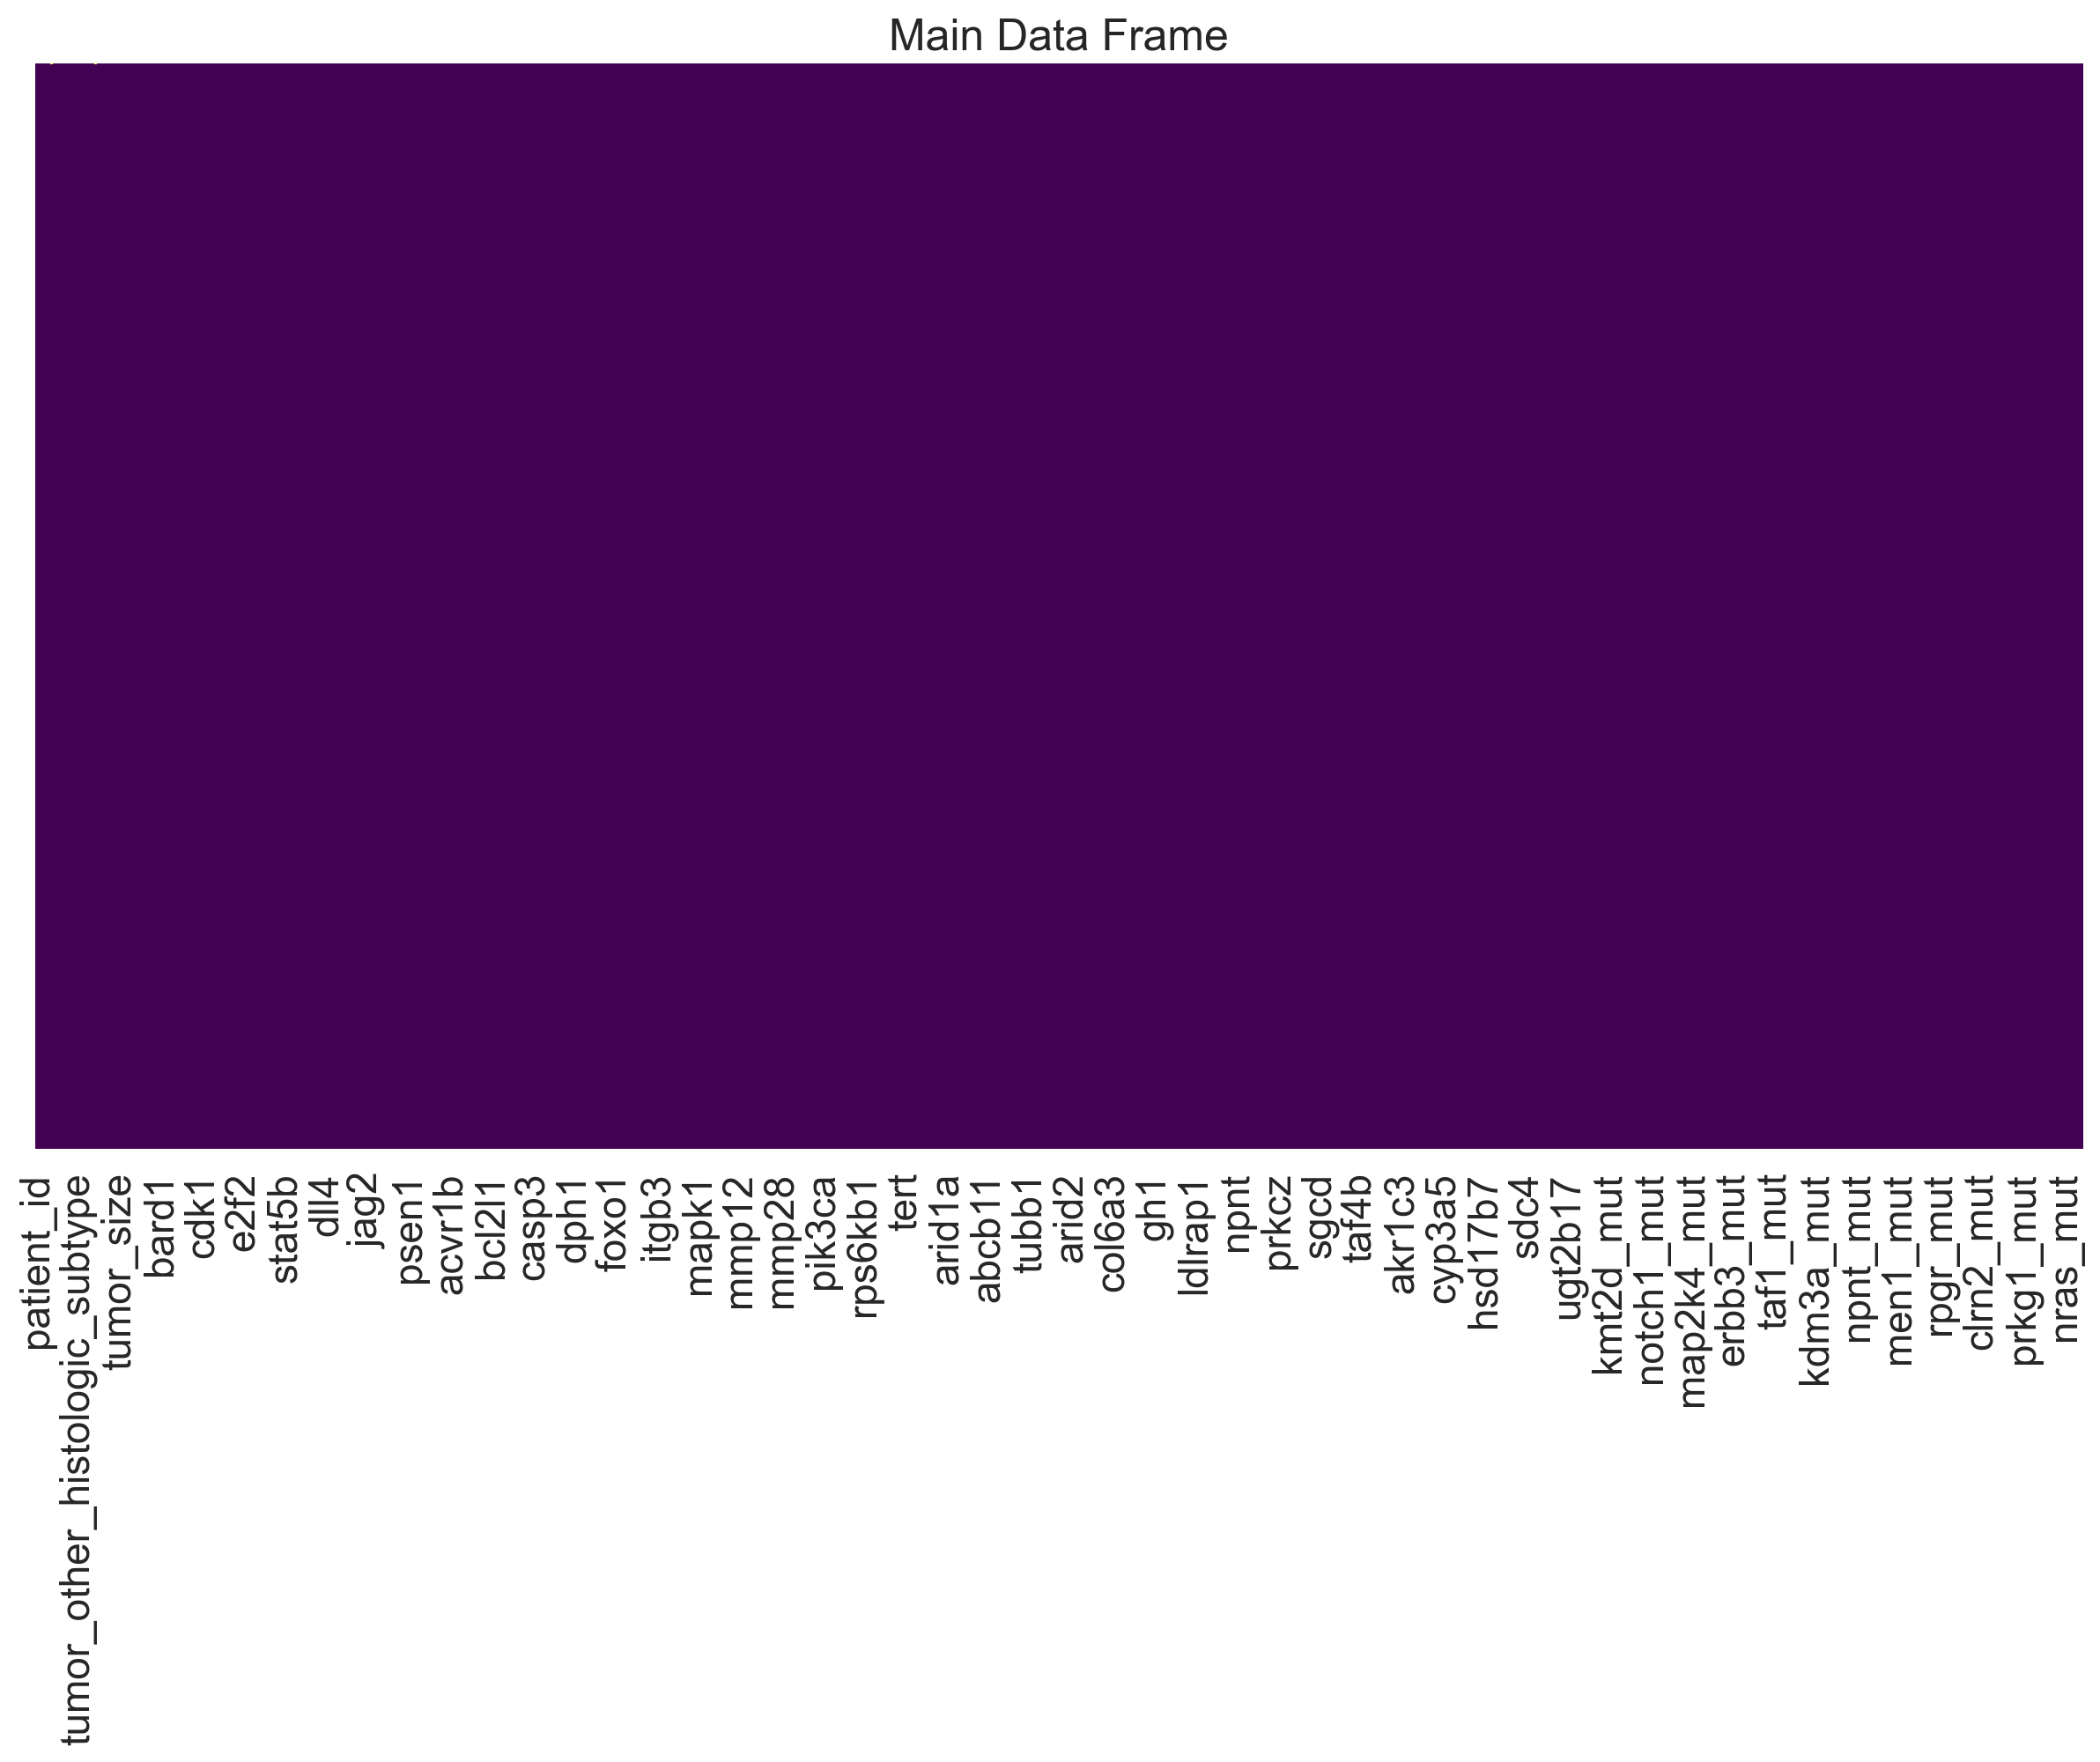

In [9]:
fig, ax = plt.subplots( figsize = (15, 8))
sns.heatmap(df_imputed.isnull(), yticklabels=False, cbar=False, cmap='viridis')
ax.set_title('Main Data Frame')
plt.show()

## Exploratory Data Analysis and Data Visualization

### create a new dataframe for clinical attributes only

In [10]:
# create a new dataframe for clinical attributes only
clinical_features_to_drop = df.columns[31:] # non clinical attributes
clinical_df = df_imputed.drop(clinical_features_to_drop, axis=1)
clinical_df.head()

patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0           0             75.65             MASTECTOMY  Breast Cancer   
1           2             43.19      BREAST CONSERVING  Breast Cancer   
2           5             48.87             MASTECTOMY  Breast Cancer   
3           6             47.68             MASTECTOMY  Breast Cancer   
4           8             76.97             MASTECTOMY  Breast Cancer   

                        cancer_type_detailed cellularity  chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN             0   
1           Breast Invasive Ductal Carcinoma        High             0   
2           Breast Invasive Ductal Carcinoma        High             1   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4  Breast Mixed Ductal and Lobular Carcinoma        High             1   

  pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ...  \
0                 claudin-low     1.0                   Positve  ...   
1                        LumA     1.0                   Positve  ...   
2                        LumB     1.0                   Positve  ...   
3                        LumB     1.0                   Positve  ...   
4                        LumB     1.0                   Positve  ...   

  nottingham_prognostic_index  oncotree_code overall_survival_months  \
0                       6.044            IDC              140.500000   
1                       4.020            IDC               84.633333   
2                       4.030            IDC              163.700000   
3                       4.050           MDLC              164.933333   
4                       6.080           MDLC               41.366667   

  overall_survival pr_status  radio_therapy 3-gene_classifier_subtype  \
0                1  Negative              1                 ER-/HER2-   
1                1  Positive              1     ER+/HER2- High Prolif   
2                0  Positive              0     ER+/HER2- High Prolif   
3                1  Positive              1     ER+/HER2- High Prolif   
4                0  Positive              1     ER+/HER2- High Prolif   

  tumor_size tumor_stage  death_from_cancer  
0       22.0         2.0             Living  
1       10.0         1.0             Living  
2       15.0         2.0    Died of Disease  
3       25.0         2.0             Living  
4       40.0         2.0    Died of Disease  

[5 rows x 31 columns]

In [11]:
clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1904 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1904 non-null   object 
 5   cellularity                     1903 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1904 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1904 non-null   float64
 12  her2_status_measured_by_snp6    19

### Removing outliers

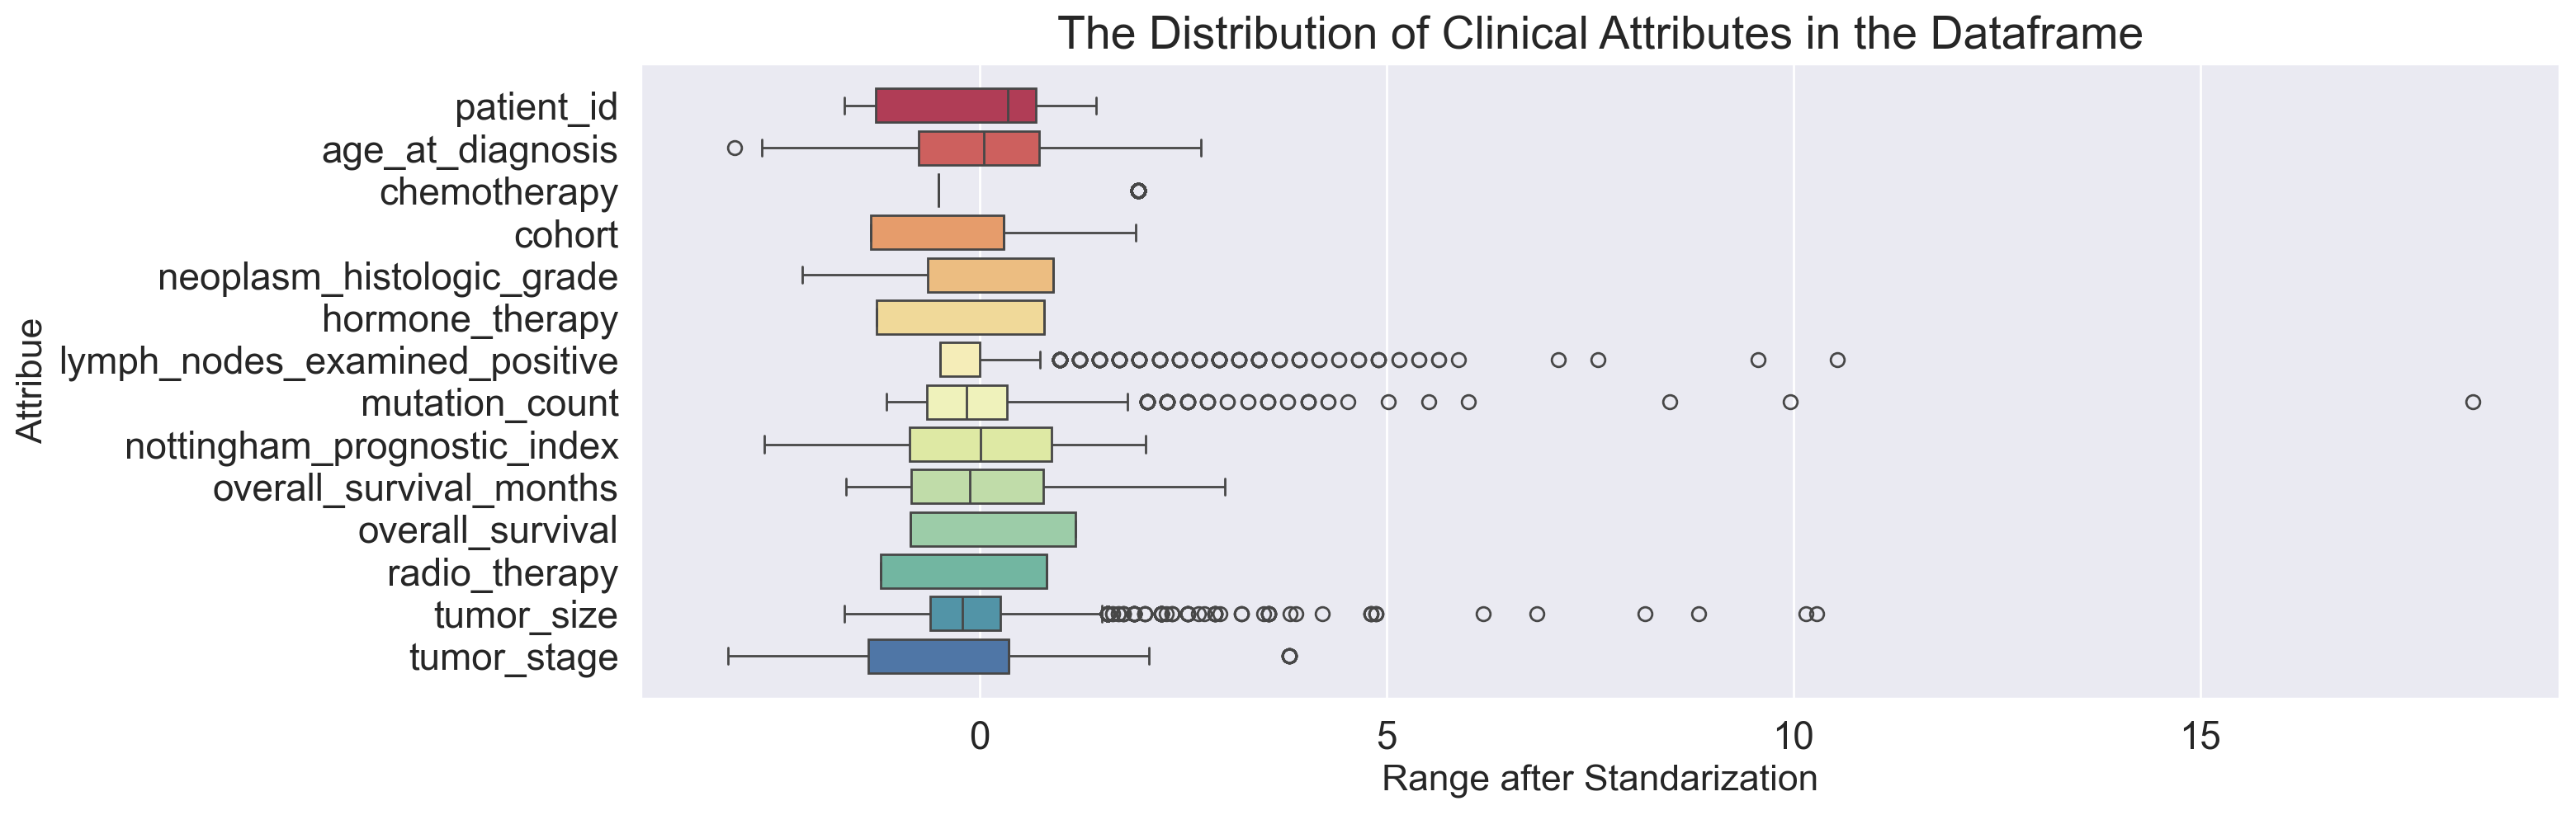

In [12]:

def to_standard (df):
    
    num_df = df[df.select_dtypes(include = np.number).columns.tolist()]
    
    ss = StandardScaler()
    std = ss.fit_transform(num_df)
    
    std_df = pd.DataFrame(std, index = num_df.index, columns = num_df.columns)
    return std_df

ax, fig = plt.subplots(1, 1, figsize = (15, 5))
plt.title('The Distribution of Clinical Attributes in the Dataframe', fontsize = 20) #Change please

sns.boxplot(y = "variable", x = "value", data = pd.melt(to_standard(clinical_df)), palette = 'Spectral')
plt.xlabel('Range after Standarization', size = 16)
plt.ylabel('Attribue', size = 16)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

### We decided to keep the outliers, as they are very important in healthcare data

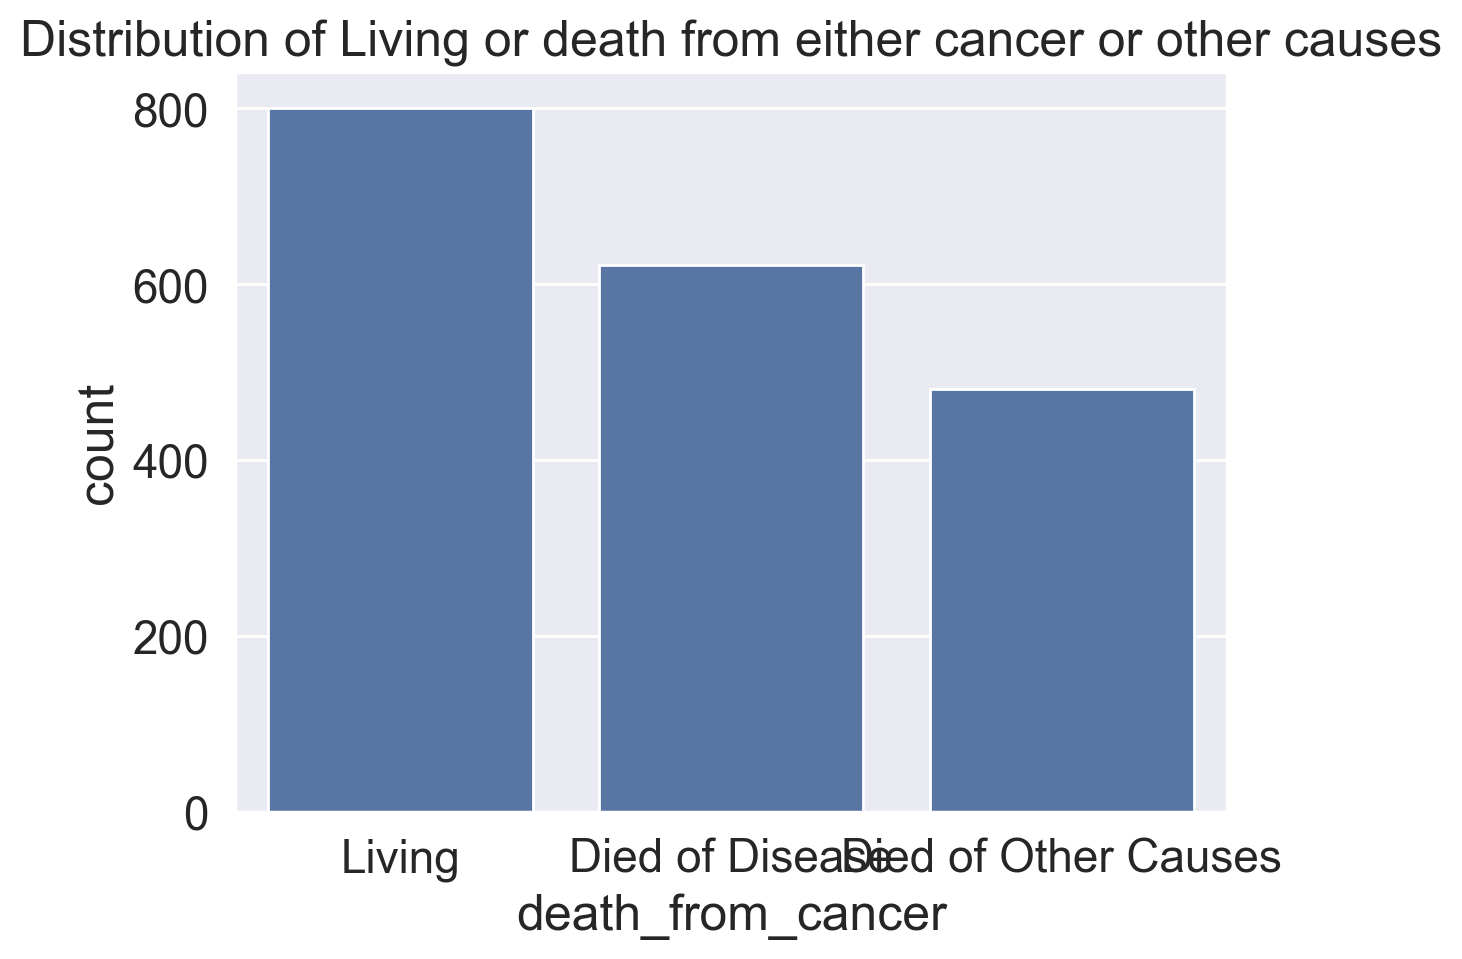

In [13]:
sns.countplot(x='death_from_cancer', data=clinical_df)
plt.title('Distribution of Living or death from either cancer or other causes')
plt.show()

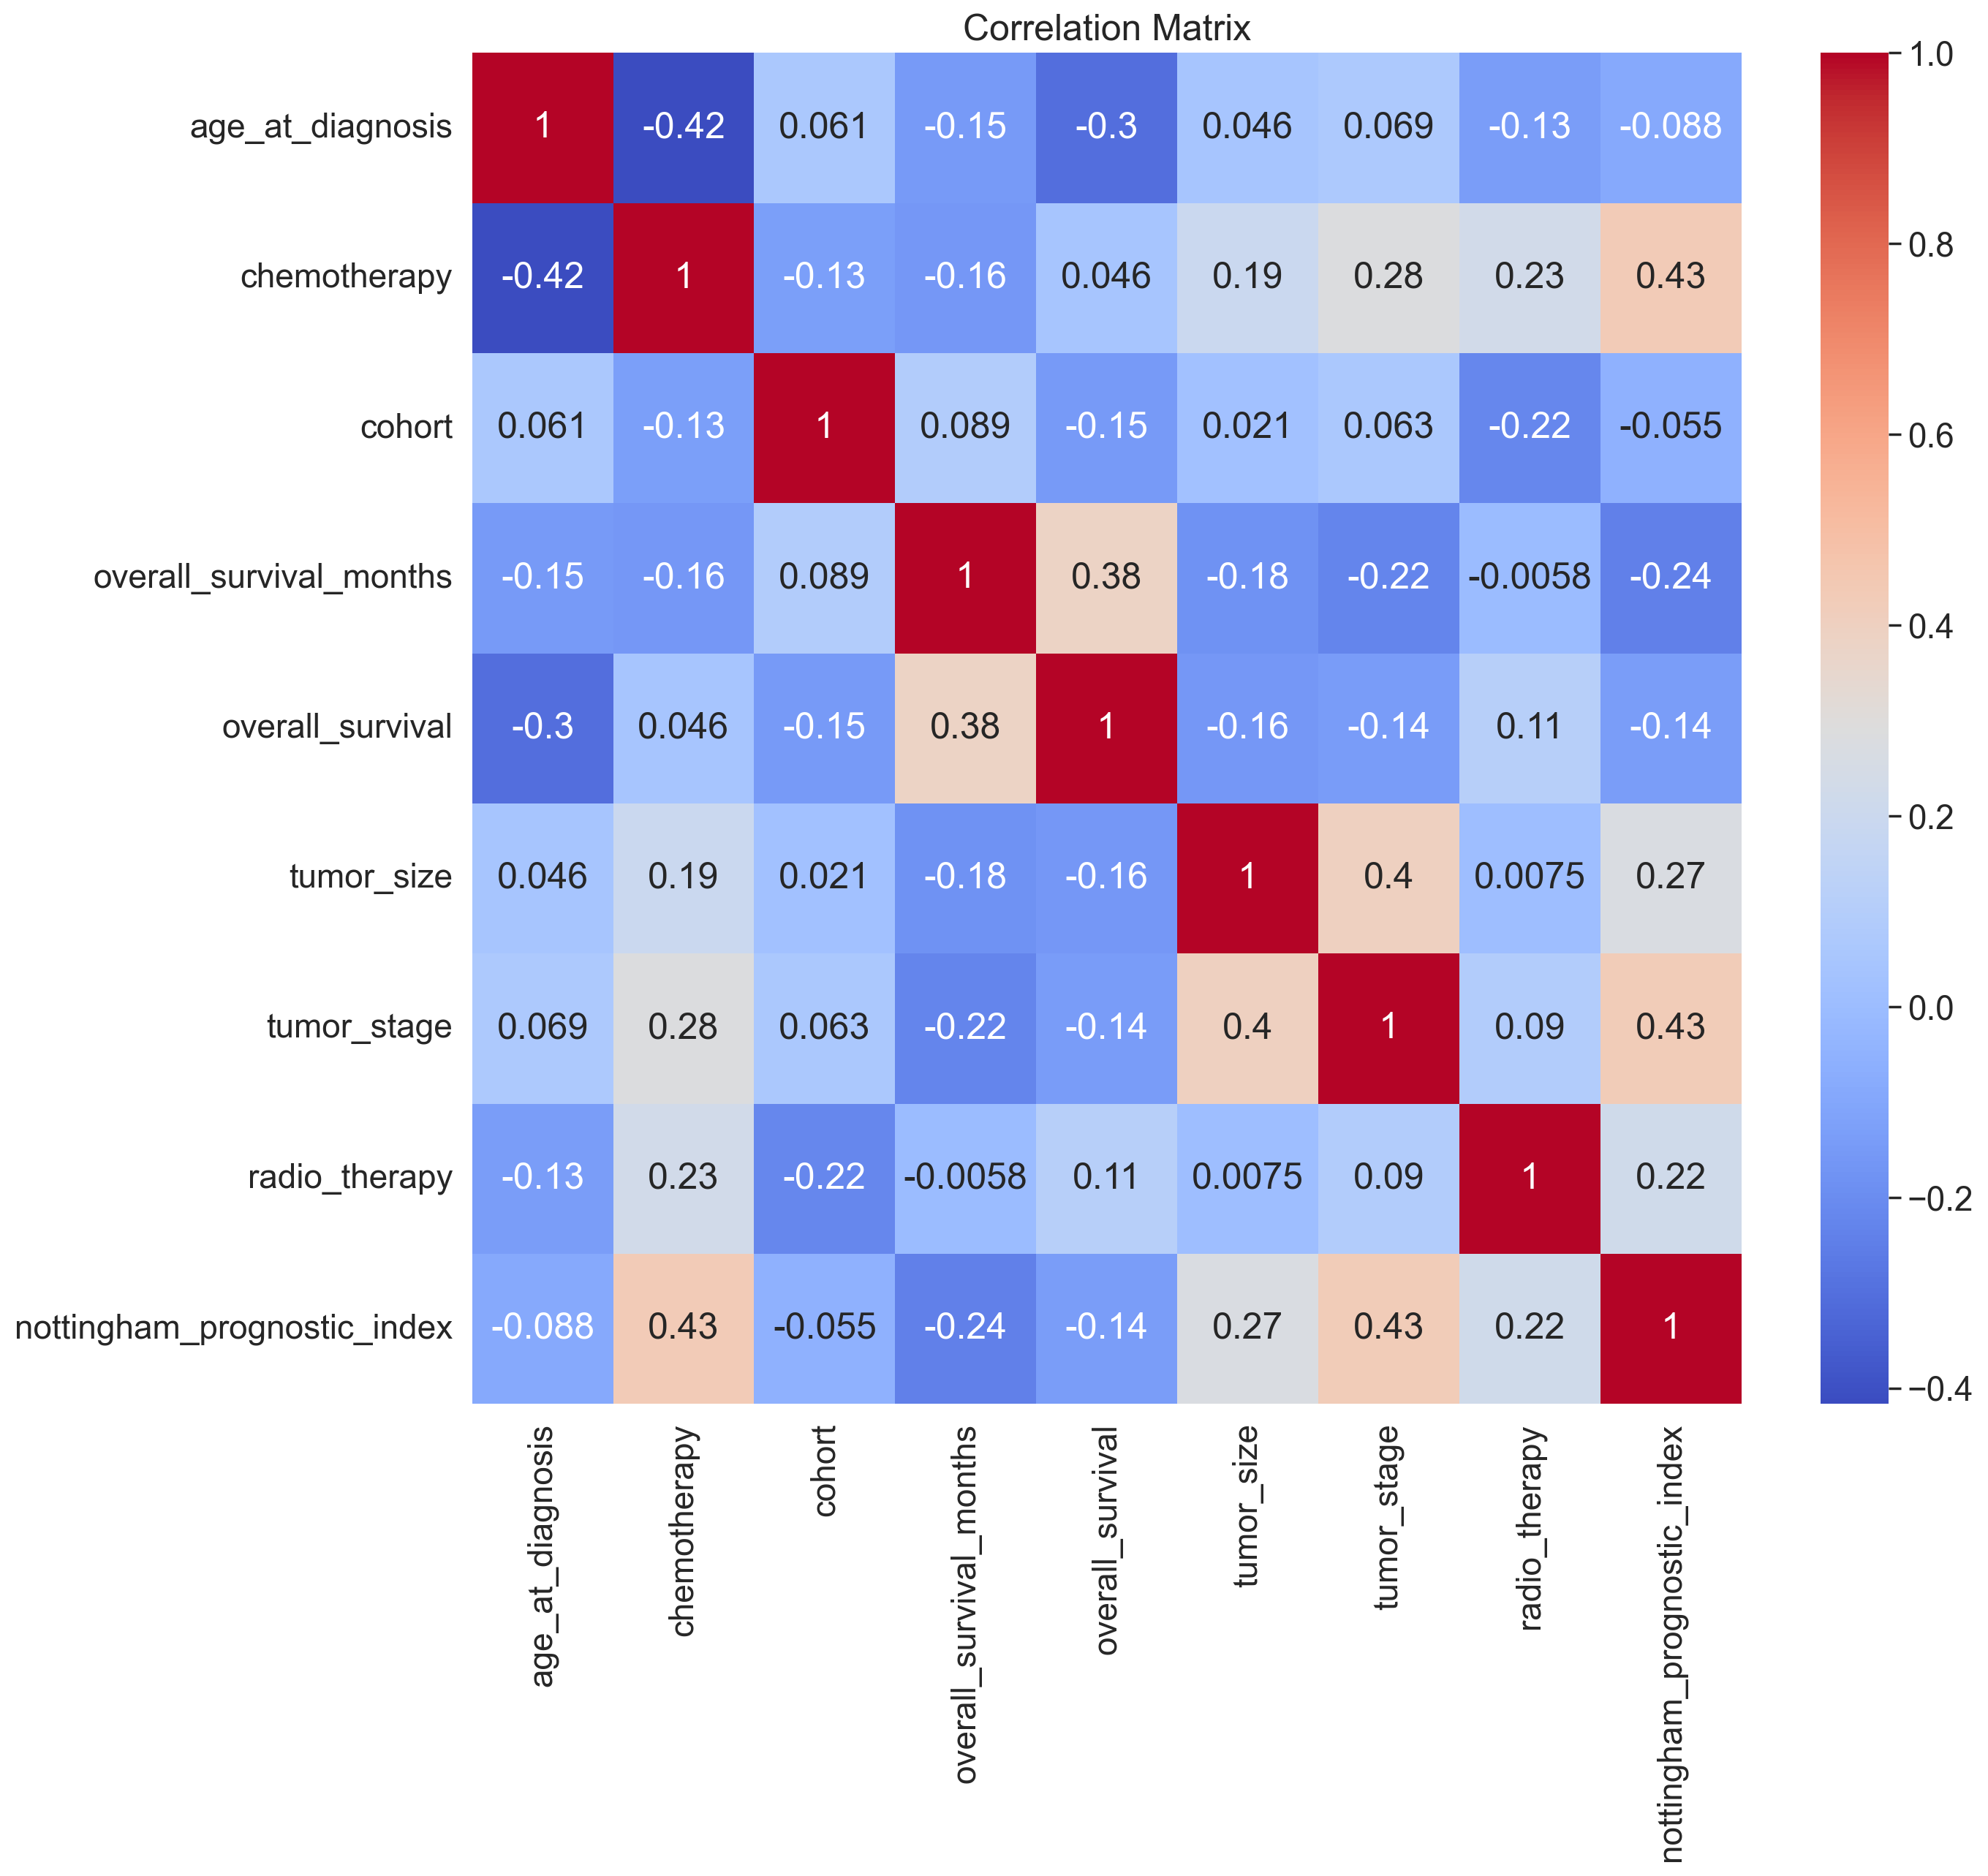

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


selected_columns = ['age_at_diagnosis', 'chemotherapy', 'cohort' , 'overall_survival_months', 'overall_survival', 'tumor_size' , 'tumor_stage', 'radio_therapy' , 'nottingham_prognostic_index']  

selected_df = clinical_df[selected_columns]

corr_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

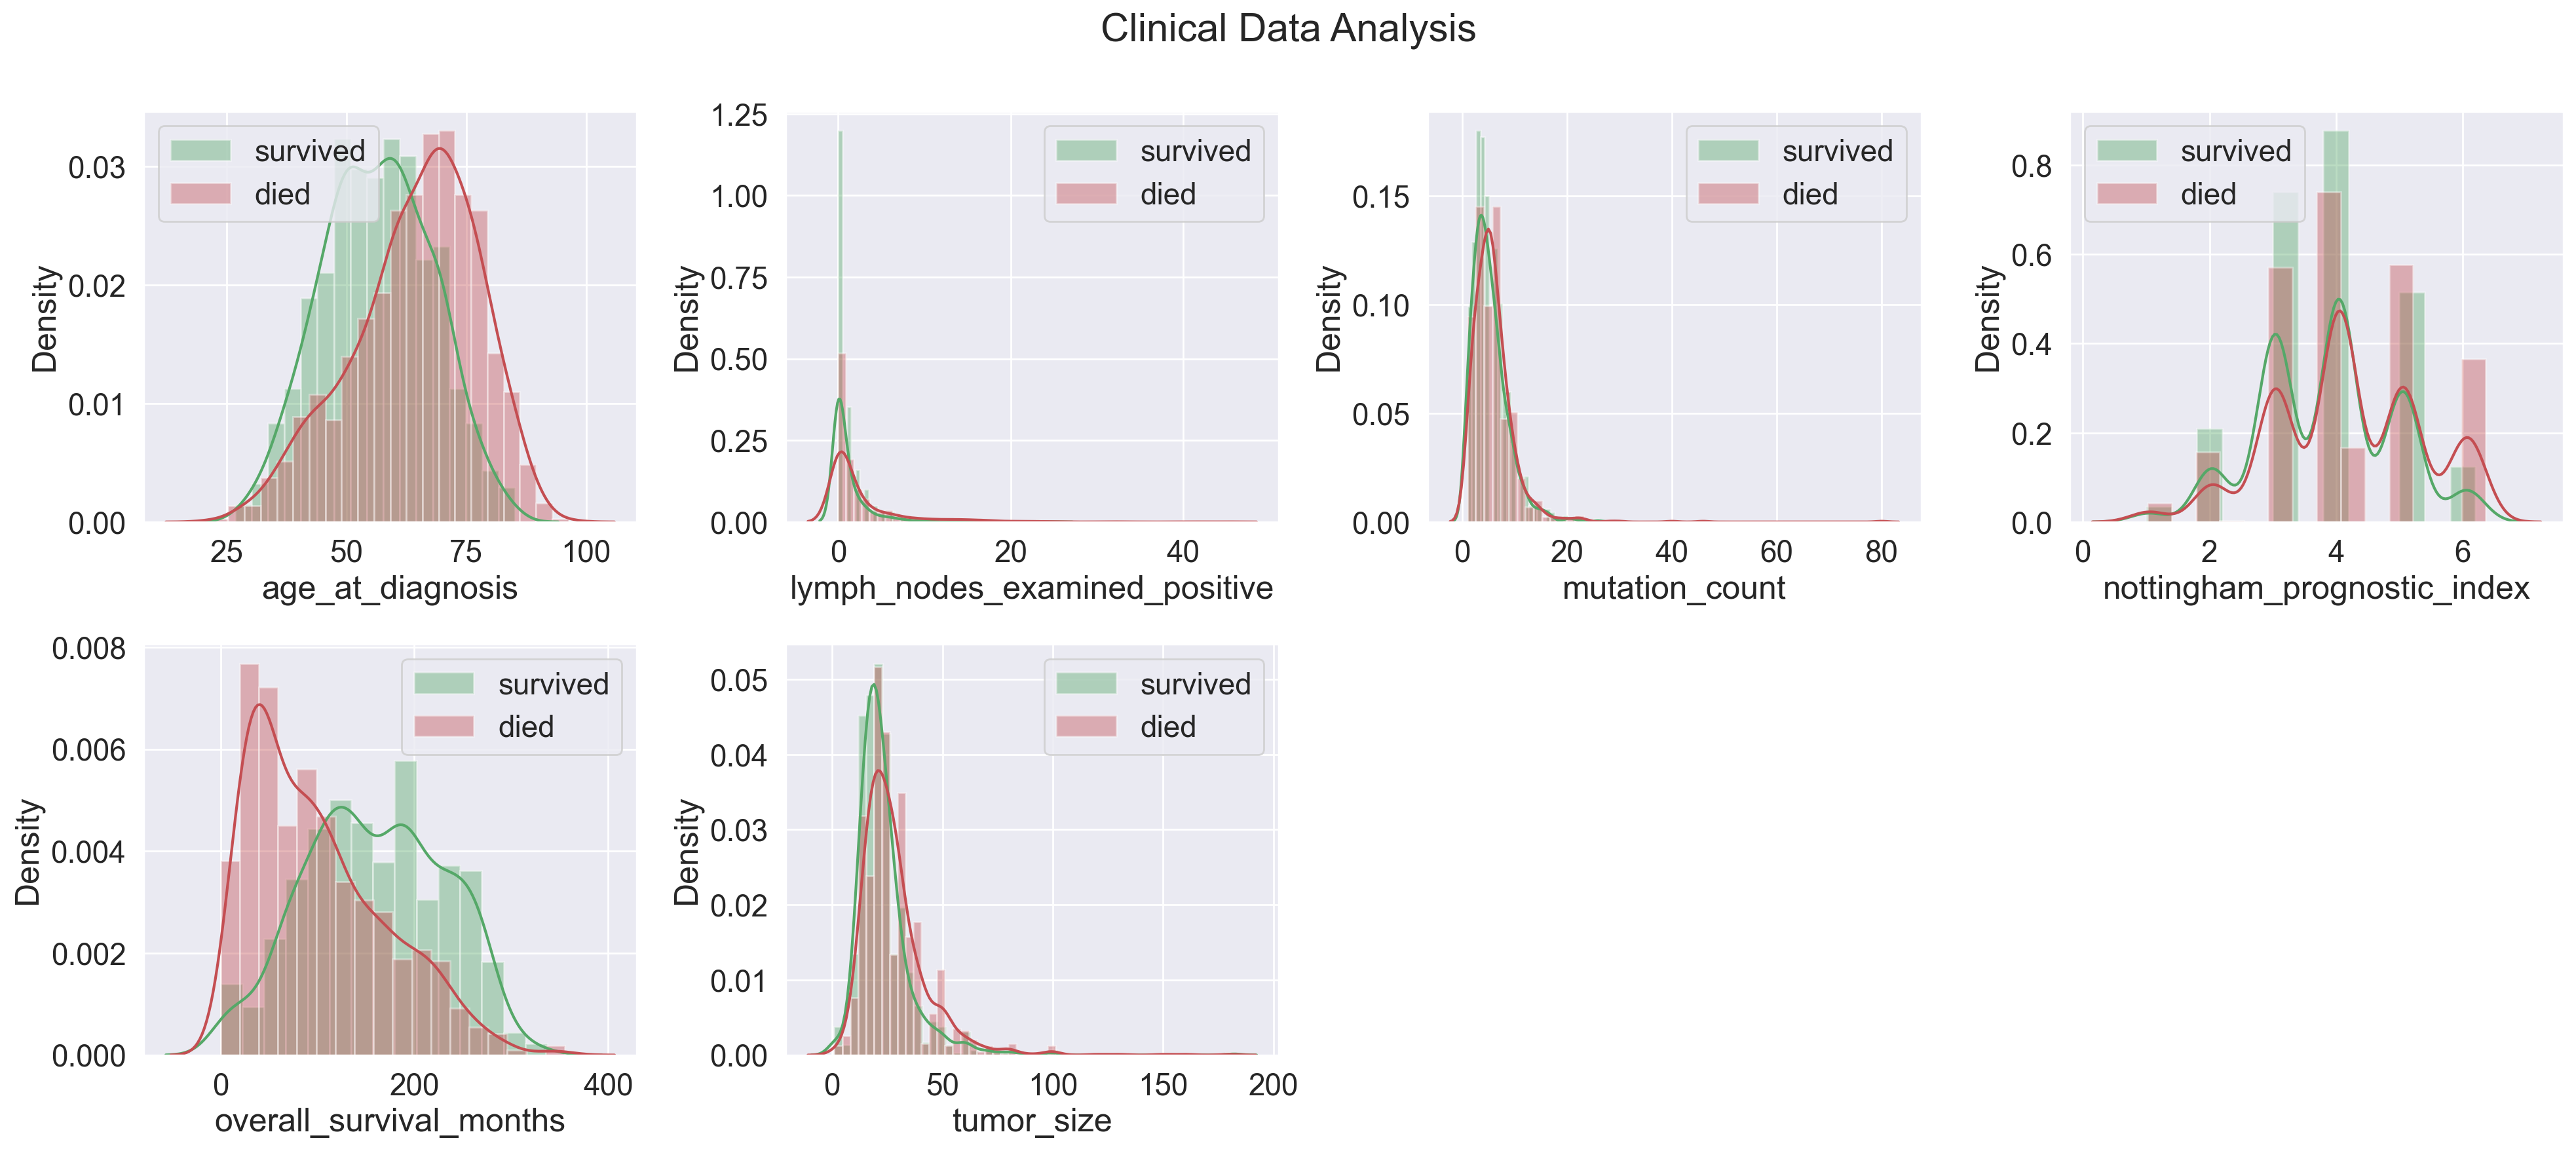

In [15]:
fig = plt.figure(figsize = (20, 25))
j = 0
num_clinical_columns= ['age_at_diagnosis', 'lymph_nodes_examined_positive','mutation_count','nottingham_prognostic_index', 'overall_survival_months', 'tumor_size' ]
for i in clinical_df[num_clinical_columns].columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(clinical_df[i][clinical_df['overall_survival']==1], color='g', label = 'survived')
    sns.distplot(clinical_df[i][clinical_df['overall_survival']==0], color='r', label = 'died')
    plt.legend(loc='best')
fig.suptitle('Clinical Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

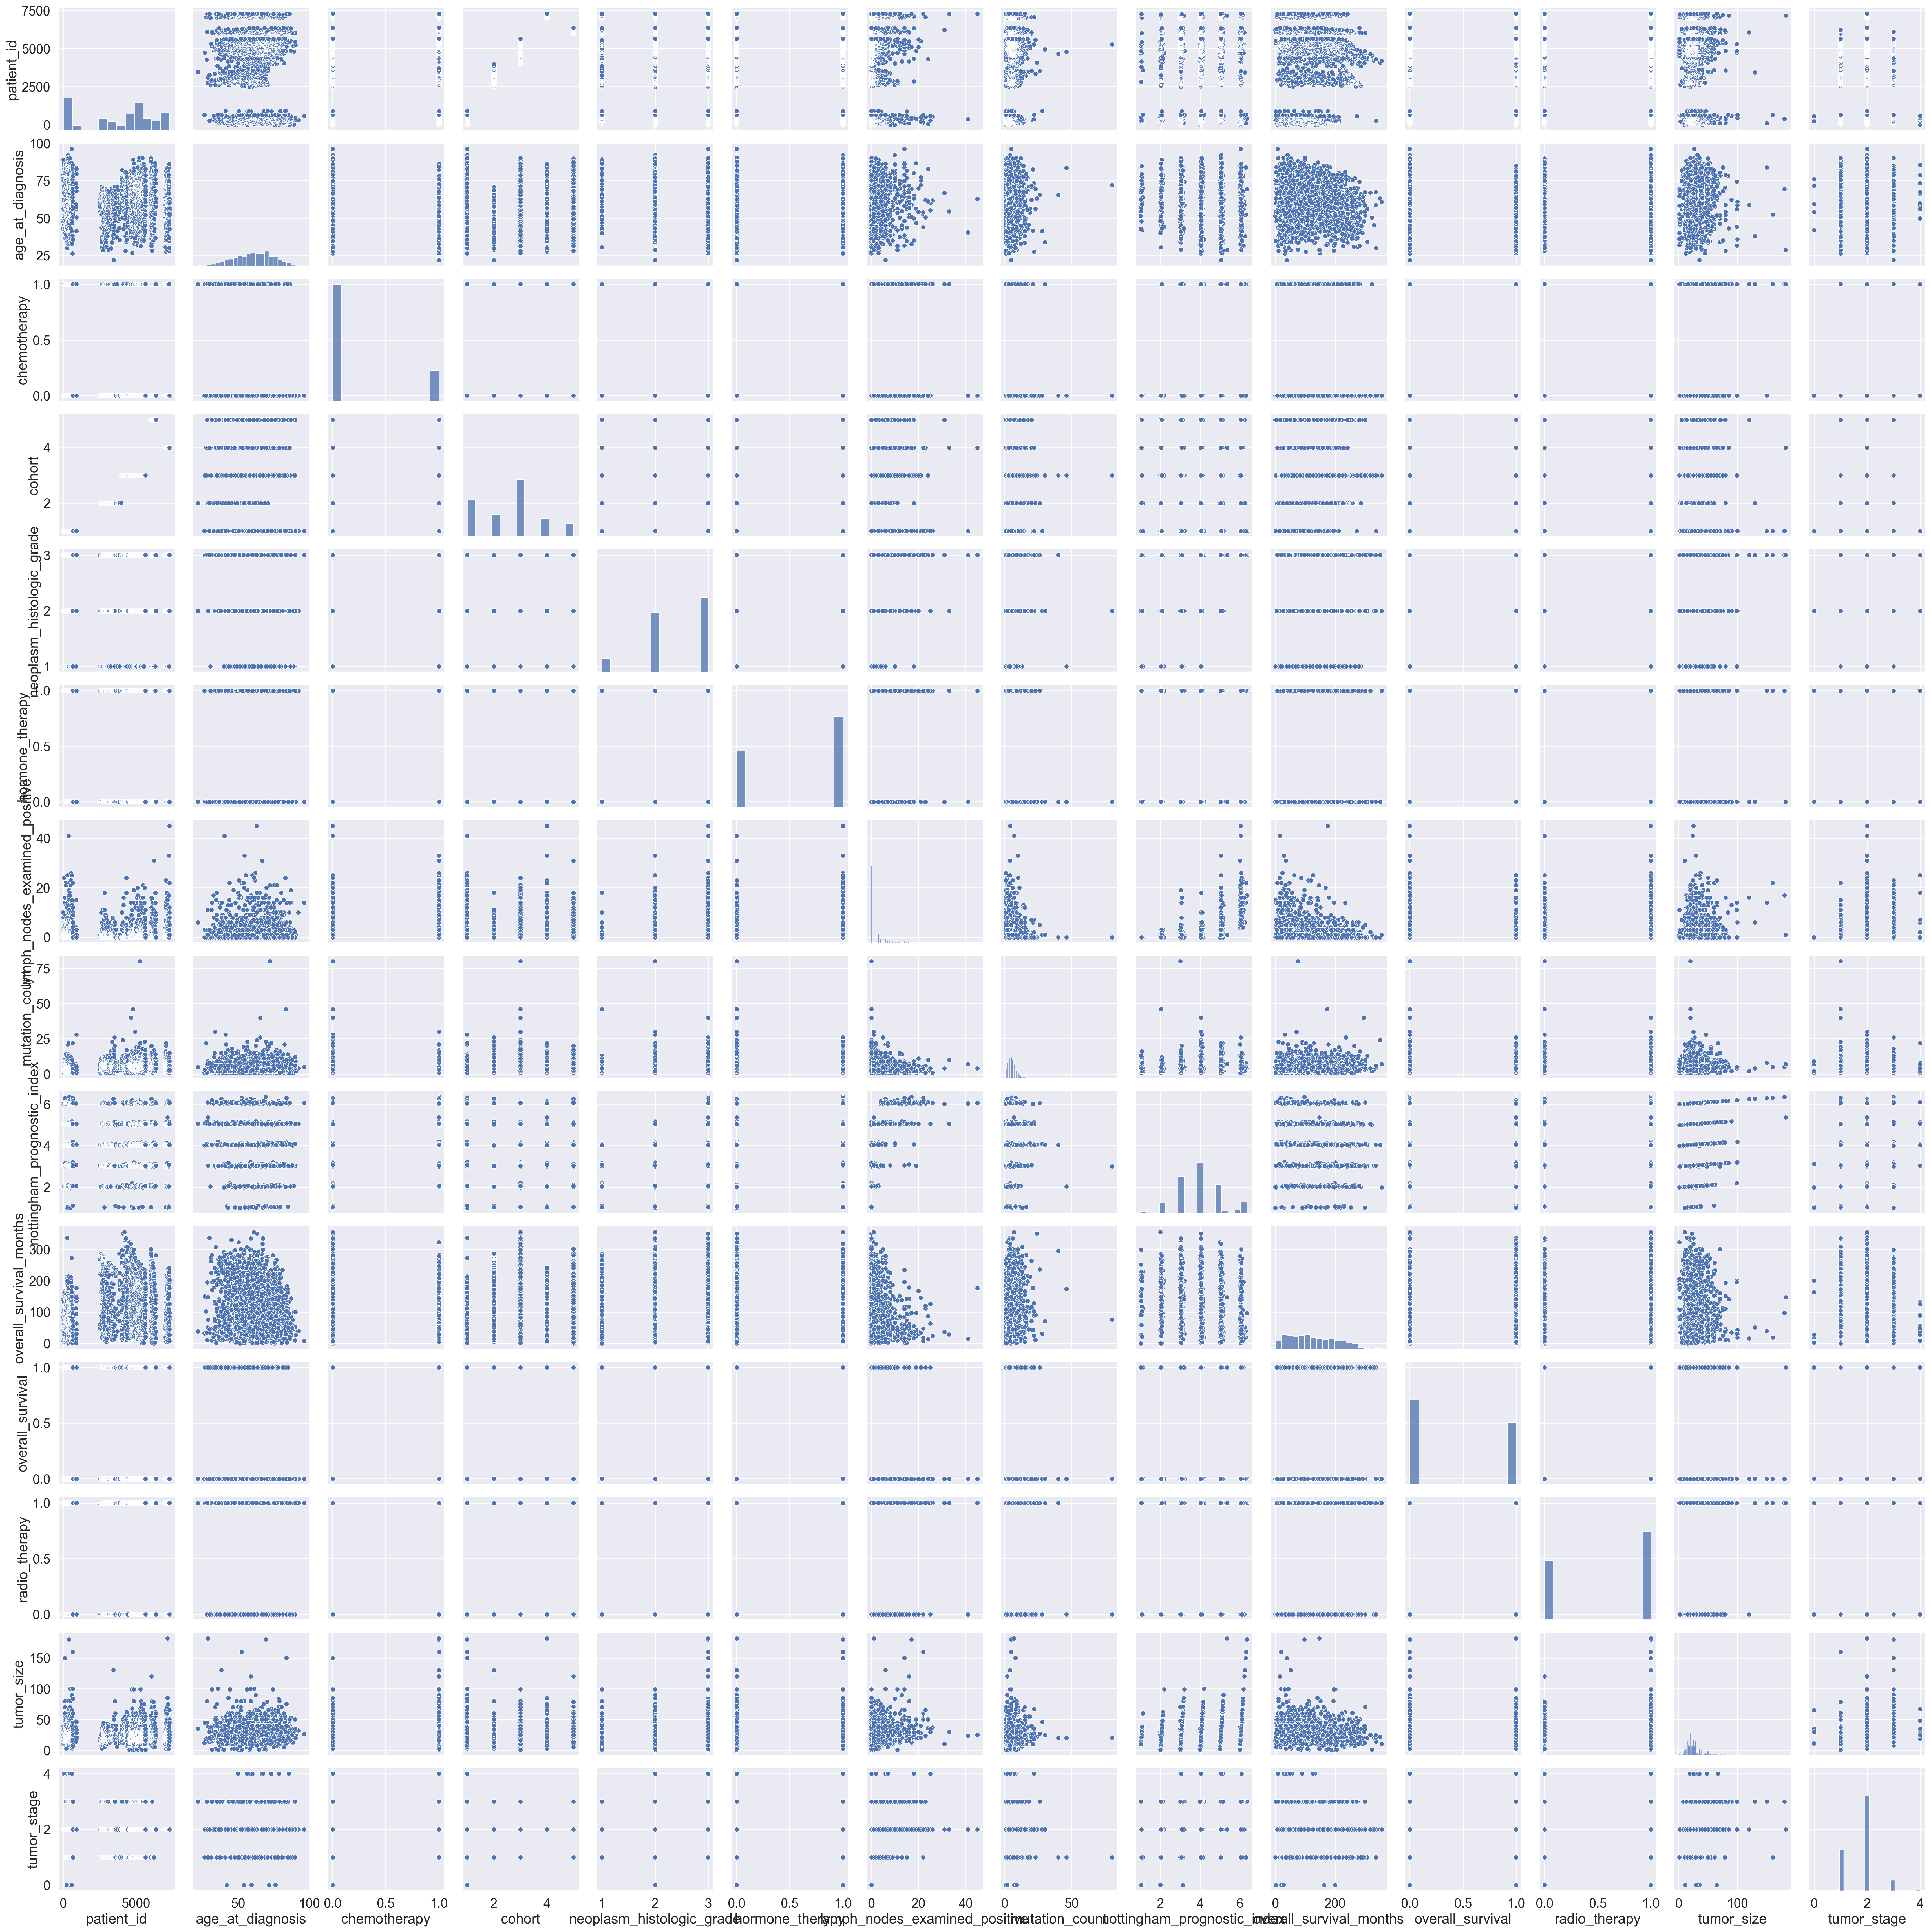

In [16]:
sns.pairplot(clinical_df)
plt.show()

In [17]:

columns_to_drop = ['cellularity', 'er_status_measured_by_ihc', 'er_status', 'her2_status_measured_by_snp6' , 'her2_status', 'tumor_other_histologic_subtype', 'oncotree_code' , 'pr_status','integrative_cluster', 'inferred_menopausal_state' , '3-gene_classifier_subtype', 'pam50_+_claudin-low_subtype']  

# Drop the specified columns
clinical_df = clinical_df.drop(columns=columns_to_drop)


In [18]:
BOLD = '\033[1m'
END = '\033[0m'
# using a stratfied k fold because we need the distribution of the to classes in all of the folds to be the same.
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print('Baseline accuracy:' )
print(df["overall_survival"].value_counts()/df["overall_survival"].count())

Baseline accuracy:
overall_survival
0    0.579307
1    0.420693
Name: count, dtype: float64


In [19]:
categorical_columns = clinical_df.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id','death_from_cancer' ]
categorical_columns = [ele for ele in categorical_columns if ele not in unwanted_columns] 
# Getting dummies for all categorical columns
dummies_clinical_df = pd.get_dummies(clinical_df.drop('patient_id',axis=1 ), columns= categorical_columns, dummy_na=True)
dummies_clinical_df.dropna(inplace = True)

In [20]:
import pandas as pd

# Assuming dummies_clinical_df is your DataFrame
# Example to display the actual column names for reference
print(dummies_clinical_df.columns)

def combine_columns(row, column_prefix):
    for col in row.index:
        if col.startswith(column_prefix) and row[col]:
            return col.replace(column_prefix, '')
    return 'nan'

# Apply the function to create new columns
dummies_clinical_df['type_of_breast_surgery'] = dummies_clinical_df.apply(lambda row: combine_columns(row, 'type_of_breast_surgery_'), axis=1)
dummies_clinical_df['cancer_type'] = dummies_clinical_df.apply(lambda row: combine_columns(row, 'cancer_type_'), axis=1)
dummies_clinical_df['cancer_type_detailed'] = dummies_clinical_df.apply(lambda row: combine_columns(row, 'cancer_type_detailed_'), axis=1)
dummies_clinical_df['primary_tumor_laterality'] = dummies_clinical_df.apply(lambda row: combine_columns(row, 'primary_tumor_laterality_'), axis=1)

# Drop original boolean columns
columns_to_drop = [
    'type_of_breast_surgery_BREAST CONSERVING', 'type_of_breast_surgery_MASTECTOMY', 'type_of_breast_surgery_nan',
    'cancer_type_Breast Cancer', 'cancer_type_Breast Sarcoma', 'cancer_type_nan',
    'cancer_type_detailed_Breast', 'cancer_type_detailed_Breast Invasive Ductal Carcinoma', 'cancer_type_detailed_Breast Invasive Lobular Carcinoma', 
    'cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma', 'cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma', 
    'cancer_type_detailed_Metaplastic Breast Cancer', 'cancer_type_detailed_nan',
    'primary_tumor_laterality_Left', 'primary_tumor_laterality_Right', 'primary_tumor_laterality_nan'
]

# Ensure the columns exist before attempting to drop them
columns_to_drop = [col for col in columns_to_drop if col in dummies_clinical_df.columns]
dummies_clinical_df = dummies_clinical_df.drop(columns=columns_to_drop)

# Convert categorical columns to numerical
dummies_clinical_df['type_of_breast_surgery'] = dummies_clinical_df['type_of_breast_surgery'].astype('category').cat.codes
dummies_clinical_df['cancer_type'] = dummies_clinical_df['cancer_type'].astype('category').cat.codes
dummies_clinical_df['cancer_type_detailed'] = dummies_clinical_df['cancer_type_detailed'].astype('category').cat.codes
dummies_clinical_df['primary_tumor_laterality'] = dummies_clinical_df['primary_tumor_laterality'].astype('category').cat.codes

# Display the modified DataFrame
print(dummies_clinical_df.head())


Index(['age_at_diagnosis', 'chemotherapy', 'cohort',
       'neoplasm_histologic_grade', 'hormone_therapy',
       'lymph_nodes_examined_positive', 'mutation_count',
       'nottingham_prognostic_index', 'overall_survival_months',
       'overall_survival', 'radio_therapy', 'tumor_size', 'tumor_stage',
       'death_from_cancer', 'type_of_breast_surgery_BREAST CONSERVING',
       'type_of_breast_surgery_MASTECTOMY', 'type_of_breast_surgery_nan',
       'cancer_type_Breast Cancer', 'cancer_type_Breast Sarcoma',
       'cancer_type_nan', 'cancer_type_detailed_Breast',
       'cancer_type_detailed_Breast Invasive Ductal Carcinoma',
       'cancer_type_detailed_Breast Invasive Lobular Carcinoma',
       'cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma',
       'cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma',
       'cancer_type_detailed_Metaplastic Breast Cancer',
       'cancer_type_detailed_nan', 'primary_tumor_laterality_Left',
       'primary_tumor_latera

#

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Feature selection using SelectKBest
X = dummies_clinical_df.drop(['death_from_cancer', 'overall_survival'], axis=1)
y = dummies_clinical_df['overall_survival']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [22]:
from sklearn.metrics import confusion_matrix


imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(), 
    'Naive Bayes': GaussianNB(),       
    'MLP Neural Network': MLPClassifier() 
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:")
    print(cm)


Training Logistic Regression...
Logistic Regression Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       243
           1       0.65      0.63      0.64       138

    accuracy                           0.75       381
   macro avg       0.72      0.72      0.72       381
weighted avg       0.74      0.75      0.74       381

Confusion Matrix for Logistic Regression:
[[197  46]
 [ 51  87]]
Training Decision Tree...
Decision Tree Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       243
           1       0.57      0.66      0.61       138

    accuracy                           0.70       381
   macro avg       0.68      0.69      0.68       381
weighted avg       0.71      0.70      0.70       381

Confusion Matrix for Decision Tree:
[[175  68]
 [ 47  91]]
Training Random Forest...
Random Forest Accuracy: 0.76
              precision    recall  f1-score  

In [23]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.75
Decision Tree Accuracy: 0.69
Random Forest Accuracy: 0.77
SVM Accuracy: 0.75
KNN Accuracy: 0.71
Gradient Boosting Accuracy: 0.77
AdaBoost Accuracy: 0.75
Naive Bayes Accuracy: 0.64
MLP Neural Network Accuracy: 0.75


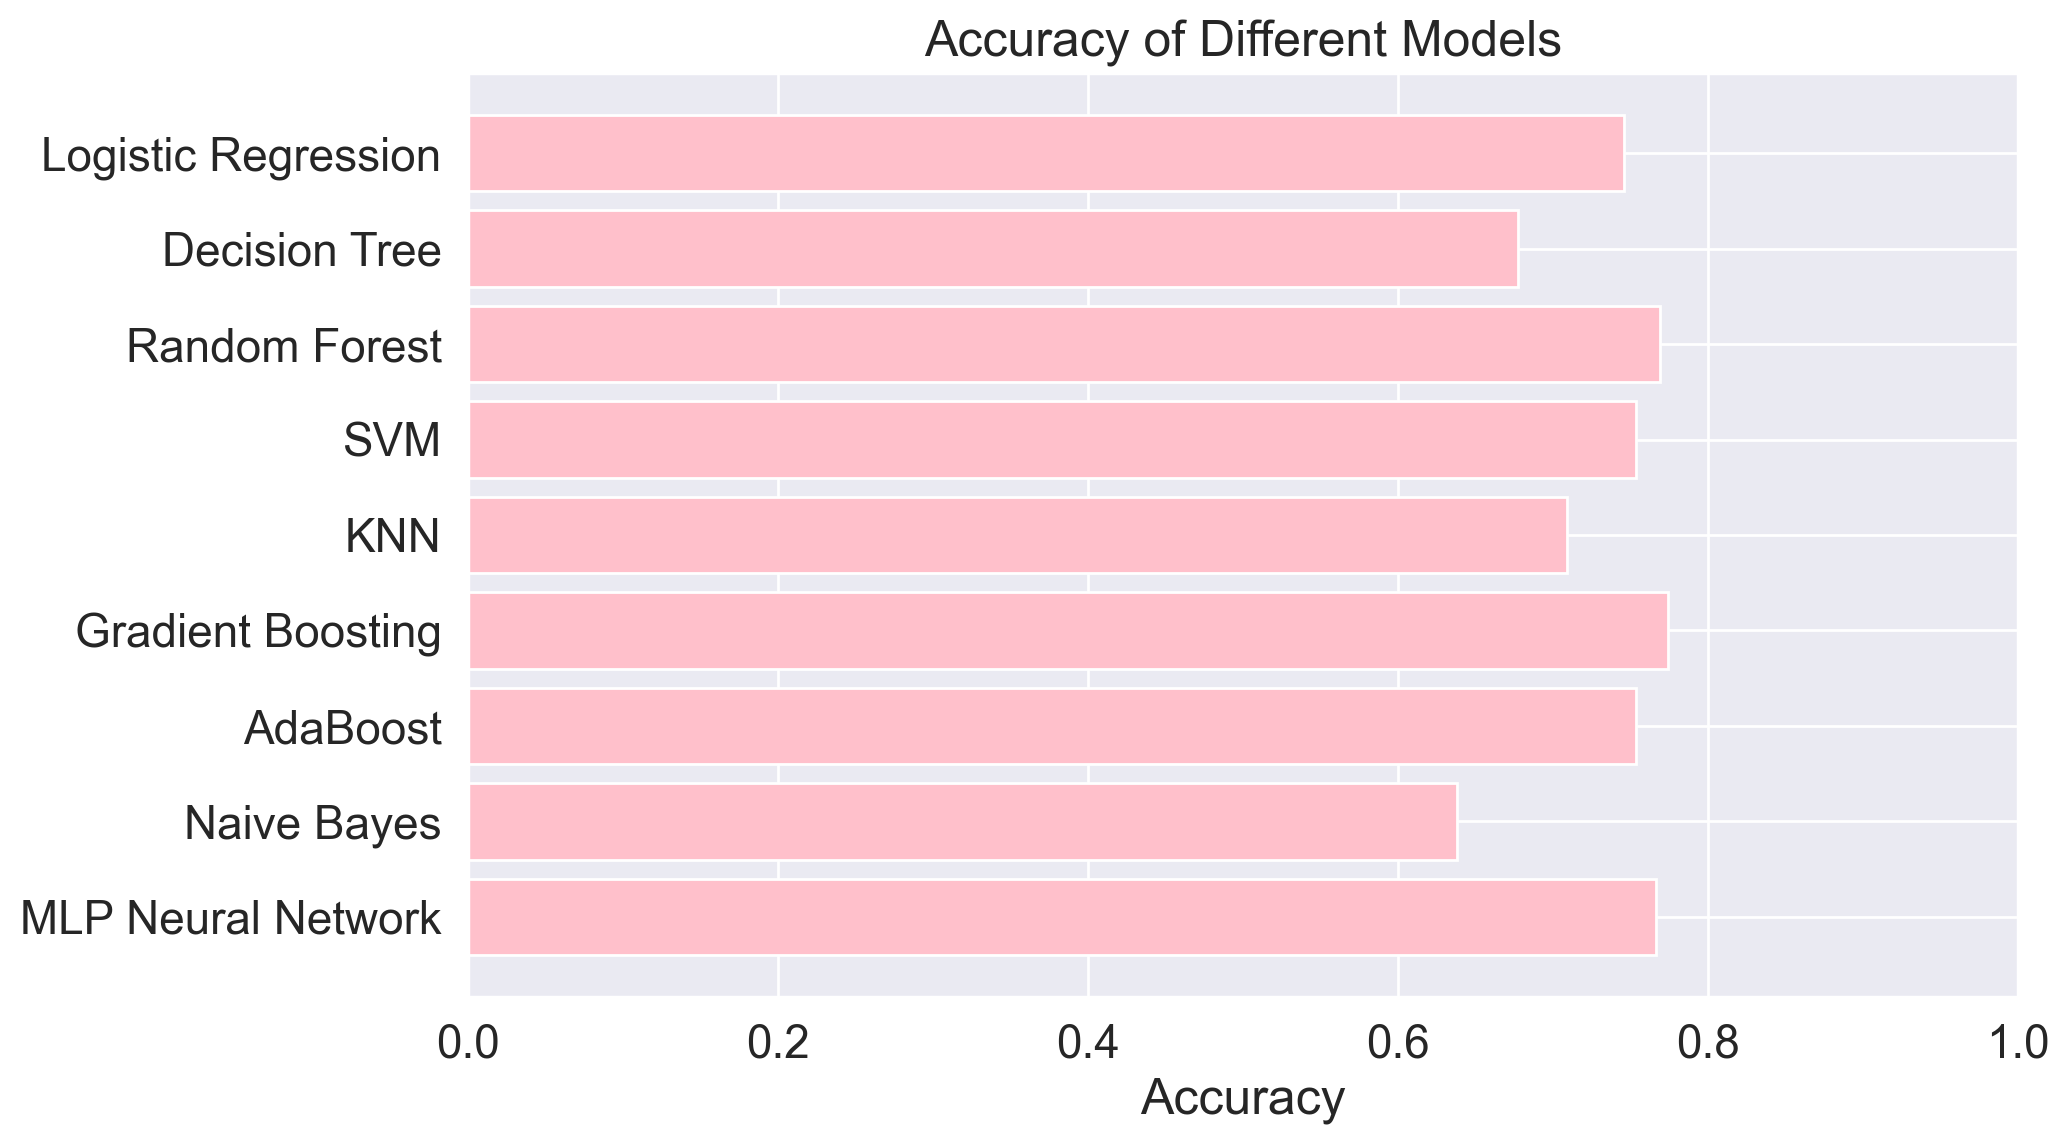

In [24]:
# Dictionary to store accuracies
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Create a bar plot for accuracies
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='pink')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis() 
plt.show()

Training Logistic Regression...
Logistic Regression - Best Parameters: {'model__C': 1, 'model__solver': 'liblinear'}
Logistic Regression - Best Cross-Validation Accuracy: 0.73
Logistic Regression - Test Accuracy: 0.75
Training Decision Tree...
Decision Tree - Best Parameters: {'model__max_depth': 10, 'model__min_samples_split': 10}
Decision Tree - Best Cross-Validation Accuracy: 0.71
Decision Tree - Test Accuracy: 0.71
Training Random Forest...
Random Forest - Best Parameters: {'model__max_depth': None, 'model__n_estimators': 100}
Random Forest - Best Cross-Validation Accuracy: 0.77
Random Forest - Test Accuracy: 0.77
Training SVM...
SVM - Best Parameters: {'model__C': 1, 'model__kernel': 'rbf'}
SVM - Best Cross-Validation Accuracy: 0.75
SVM - Test Accuracy: 0.76
Training KNN...
KNN - Best Parameters: {'model__n_neighbors': 7, 'model__weights': 'uniform'}
KNN - Best Cross-Validation Accuracy: 0.70
KNN - Test Accuracy: 0.71
Training Gradient Boosting...
Gradient Boosting - Best Paramete

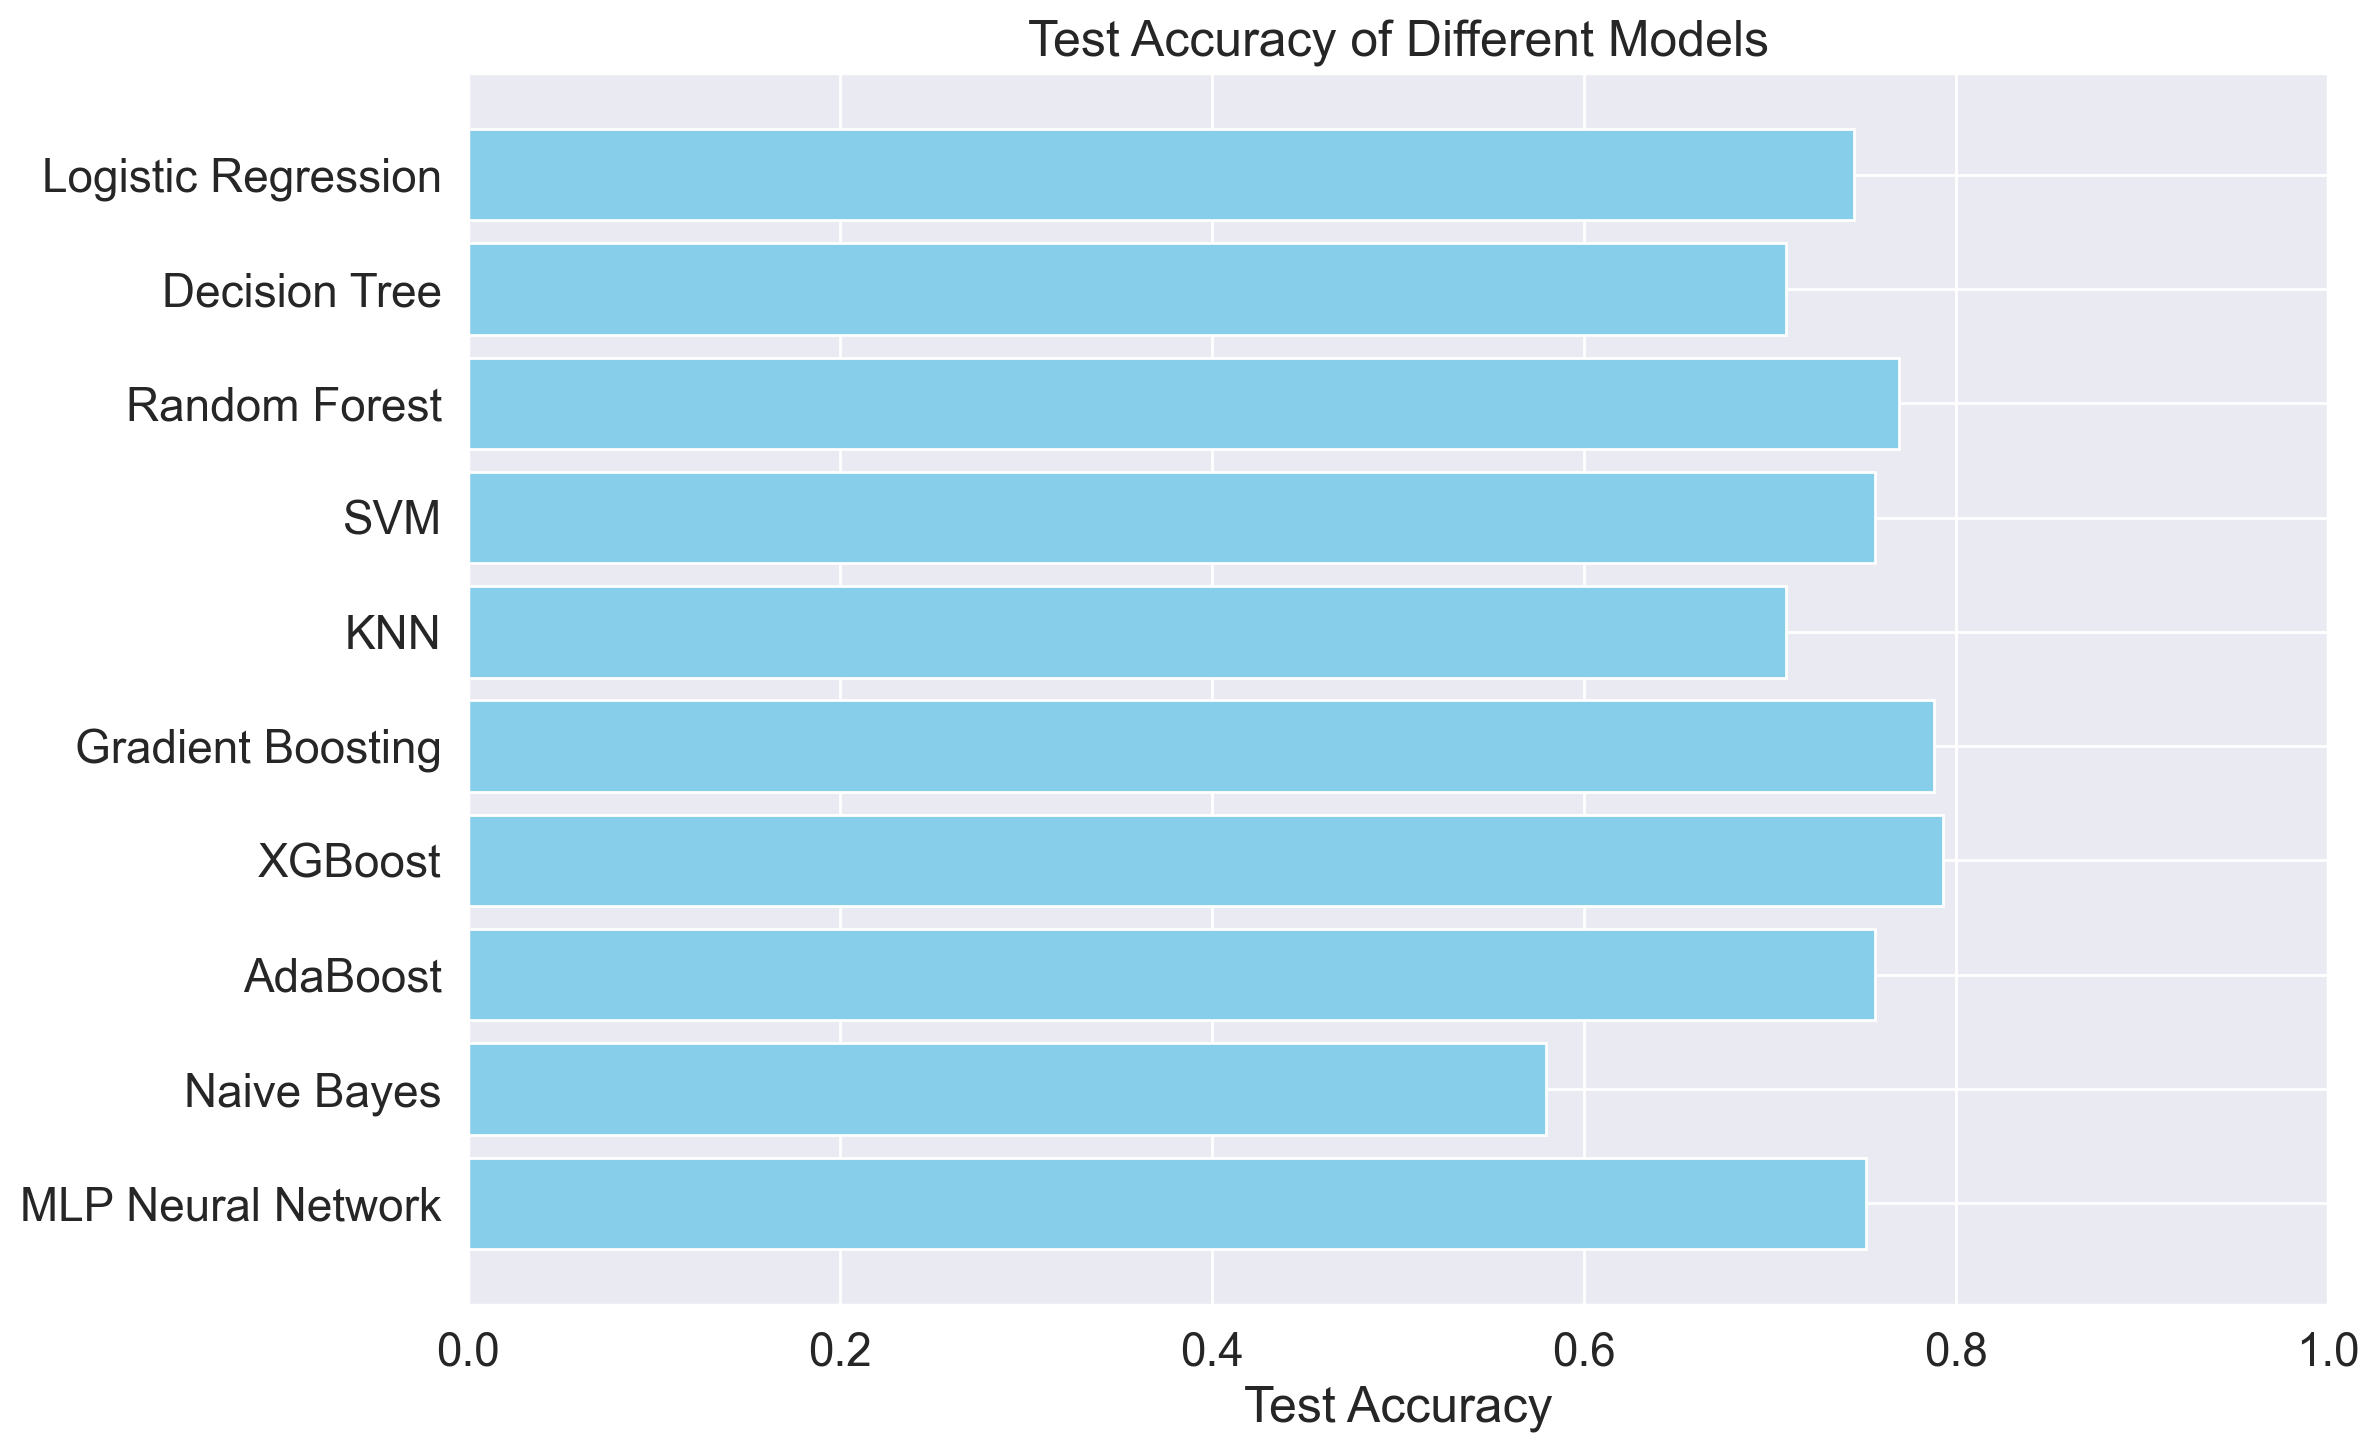

In [25]:

# Define the parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'model__C': [0.1, 1, 10],
            'model__solver': ['liblinear']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [None, 10, 20, 30]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'model__C': [0.1, 1, 10],
            'model__kernel': ['linear', 'rbf']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'model__n_neighbors': [3, 5, 7],
            'model__weights': ['uniform', 'distance']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'MLP Neural Network': {
        'model': MLPClassifier(),
        'params': {
            'model__hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'model__activation': ['relu', 'tanh'],
            'model__solver': ['adam', 'sgd']
        }
    }
}

# Splitting the data into training and testing sets with stratification
X = dummies_clinical_df.drop(['death_from_cancer', 'overall_survival'], axis=1)
y = dummies_clinical_df['overall_survival']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# Dictionary to store results
results = {}

# Loop through each model and perform GridSearchCV with preprocessing steps
for model_name, config in param_grids.items():
    print(f"Training {model_name}...")
    
    # Create a pipeline with imputation, scaling, and the model
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('model', config['model'])
    ])
    
    grid_search = GridSearchCV(estimator=pipeline, param_grid=config['params'], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Evaluate on the test data
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    results[model_name] = {
        'best_params': best_params,
        'best_score': best_score,
        'test_accuracy': test_accuracy,
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    print(f"{model_name} - Best Parameters: {best_params}")
    print(f"{model_name} - Best Cross-Validation Accuracy: {best_score:.2f}")
    print(f"{model_name} - Test Accuracy: {test_accuracy:.2f}")

# Print a summary of results
for model_name, result in results.items():
    print(f"\n{model_name} Results:")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Best Cross-Validation Accuracy: {result['best_score']:.2f}")
    print(f"Test Accuracy: {result['test_accuracy']:.2f}")
    print("Classification Report:")
    print(pd.DataFrame(result['classification_report']).transpose())
    print("Confusion Matrix:")
    print(result['confusion_matrix'])

# Create a bar plot for test accuracies
test_accuracies = {model_name: result['test_accuracy'] for model_name, result in results.items()}

plt.figure(figsize=(12, 8))
plt.barh(list(test_accuracies.keys()), list(test_accuracies.values()), color='skyblue')
plt.xlabel('Test Accuracy')
plt.title('Test Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()


In [40]:
import streamlit as st
import pickle
import pandas as pd
import sklearn


modelR=models['Random Forest']



In [41]:
#Deployment
import joblib
file='Survival_prediction'
joblib.dump(modelR,"Survivalprediction")
model=joblib.load(open("Survivalprediction",'rb'))

In [42]:
dummies_clinical_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1903 entries, 1 to 1903
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age_at_diagnosis               1903 non-null   float64
 1   chemotherapy                   1903 non-null   int64  
 2   cohort                         1903 non-null   float64
 3   neoplasm_histologic_grade      1903 non-null   float64
 4   hormone_therapy                1903 non-null   int64  
 5   lymph_nodes_examined_positive  1903 non-null   float64
 6   mutation_count                 1903 non-null   float64
 7   nottingham_prognostic_index    1903 non-null   float64
 8   overall_survival_months        1903 non-null   float64
 9   overall_survival               1903 non-null   int64  
 10  radio_therapy                  1903 non-null   int64  
 11  tumor_size                     1903 non-null   float64
 12  tumor_stage                    1903 non-null   float6